# **Load Dataset**

In [1]:
# dependencies
!pip install -q scikit-learn numpy matplotlib seaborn missingno catboost lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 22.9 MB/s eta 0:00:00


In [2]:
# imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load dataset from kaggle
import kagglehub

path = kagglehub.dataset_download("sakhawat18/asteroid-dataset")

print("Path to dataset files:", path)

100%|██████████| 182M/182M [00:10<00:00, 18.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sakhawat18/asteroid-dataset/versions/224


In [4]:
# locate installed dataset
import os

os.listdir(path)

['dataset.csv']

In [5]:
# load dataset into pandas dataframe
import pandas as pd

df = pd.read_csv(os.path.join(path, "dataset.csv"))
df.head()

<ipython-input-5-3e3b83c0a9be>:4: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, "dataset.csv"))


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


# **Explore Data**

<Axes: >

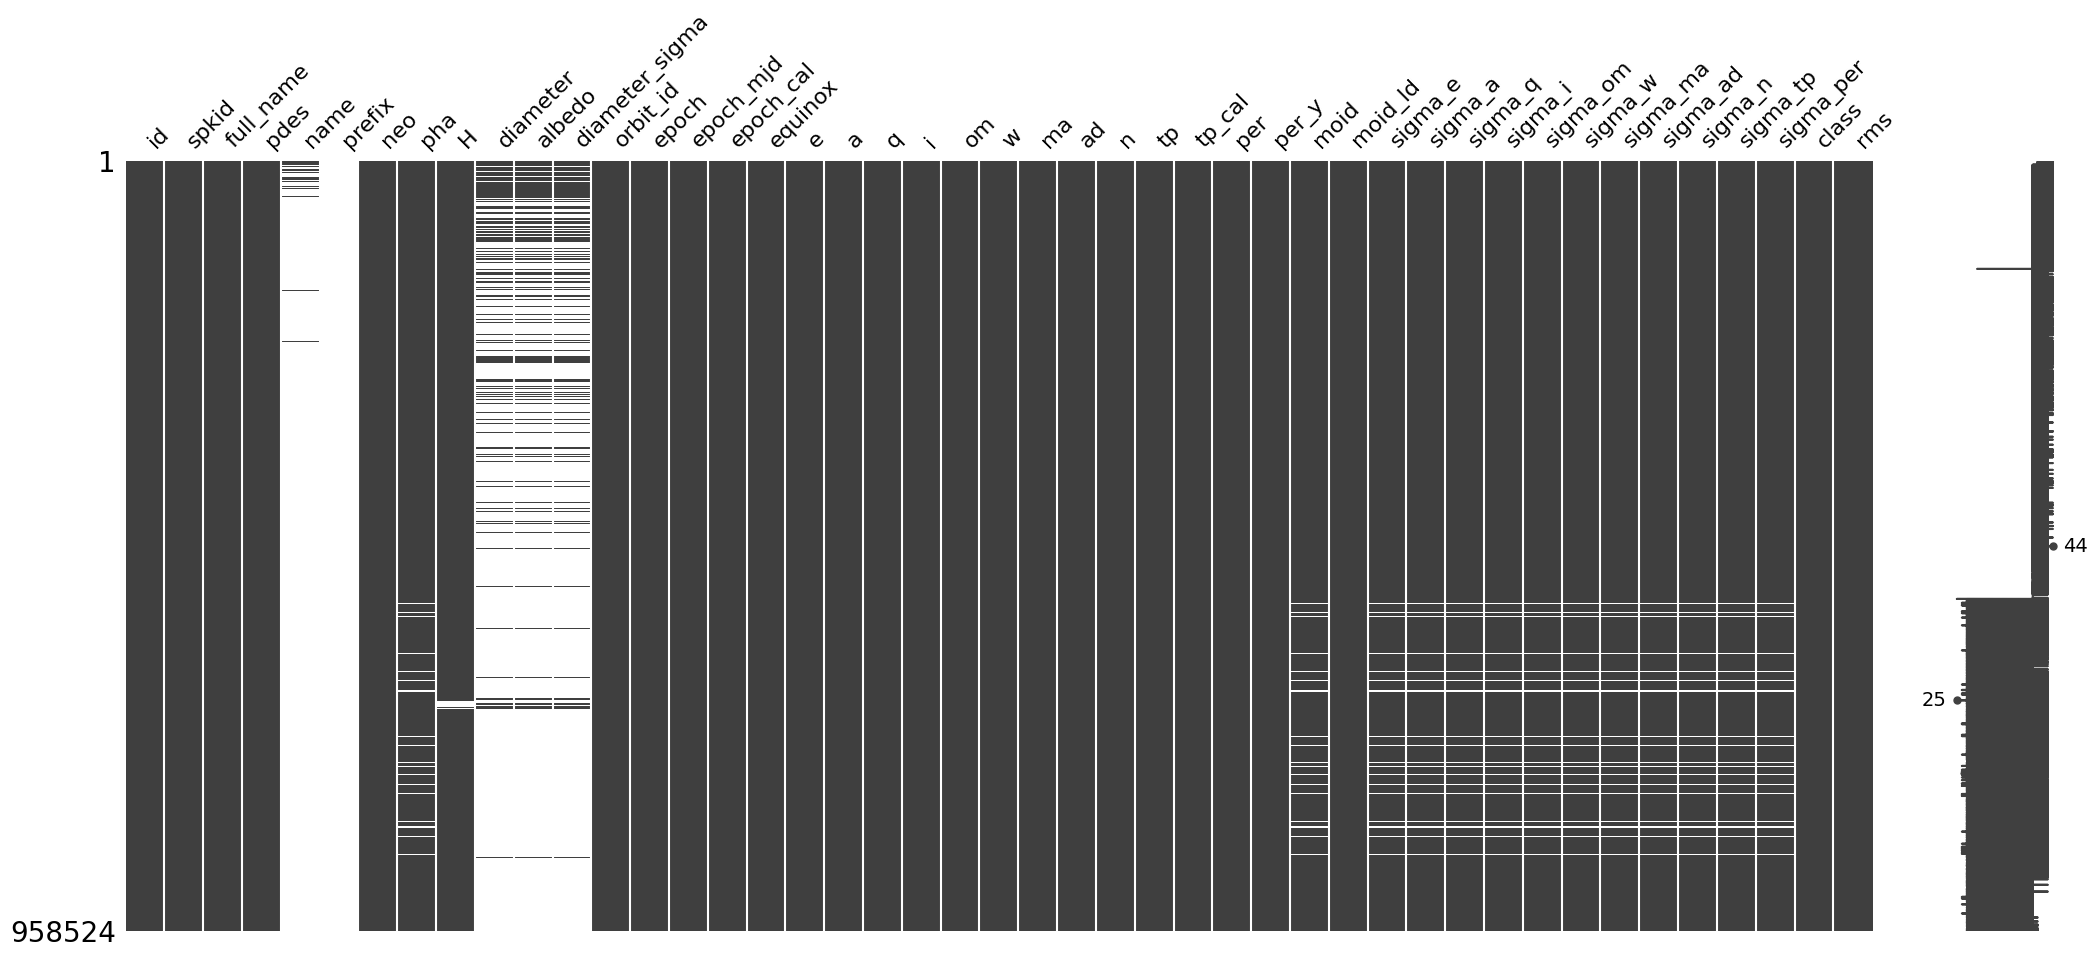

In [6]:
# plot missing data
import missingno as msno

%matplotlib inline
msno.matrix(df)

array([[<Axes: title={'center': 'spkid'}>, <Axes: title={'center': 'H'}>,
        <Axes: title={'center': 'diameter'}>,
        <Axes: title={'center': 'albedo'}>,
        <Axes: title={'center': 'diameter_sigma'}>,
        <Axes: title={'center': 'epoch'}>],
       [<Axes: title={'center': 'epoch_mjd'}>,
        <Axes: title={'center': 'epoch_cal'}>,
        <Axes: title={'center': 'e'}>, <Axes: title={'center': 'a'}>,
        <Axes: title={'center': 'q'}>, <Axes: title={'center': 'i'}>],
       [<Axes: title={'center': 'om'}>, <Axes: title={'center': 'w'}>,
        <Axes: title={'center': 'ma'}>, <Axes: title={'center': 'ad'}>,
        <Axes: title={'center': 'n'}>, <Axes: title={'center': 'tp'}>],
       [<Axes: title={'center': 'tp_cal'}>,
        <Axes: title={'center': 'per'}>,
        <Axes: title={'center': 'per_y'}>,
        <Axes: title={'center': 'moid'}>,
        <Axes: title={'center': 'moid_ld'}>,
        <Axes: title={'center': 'sigma_e'}>],
       [<Axes: title={'center

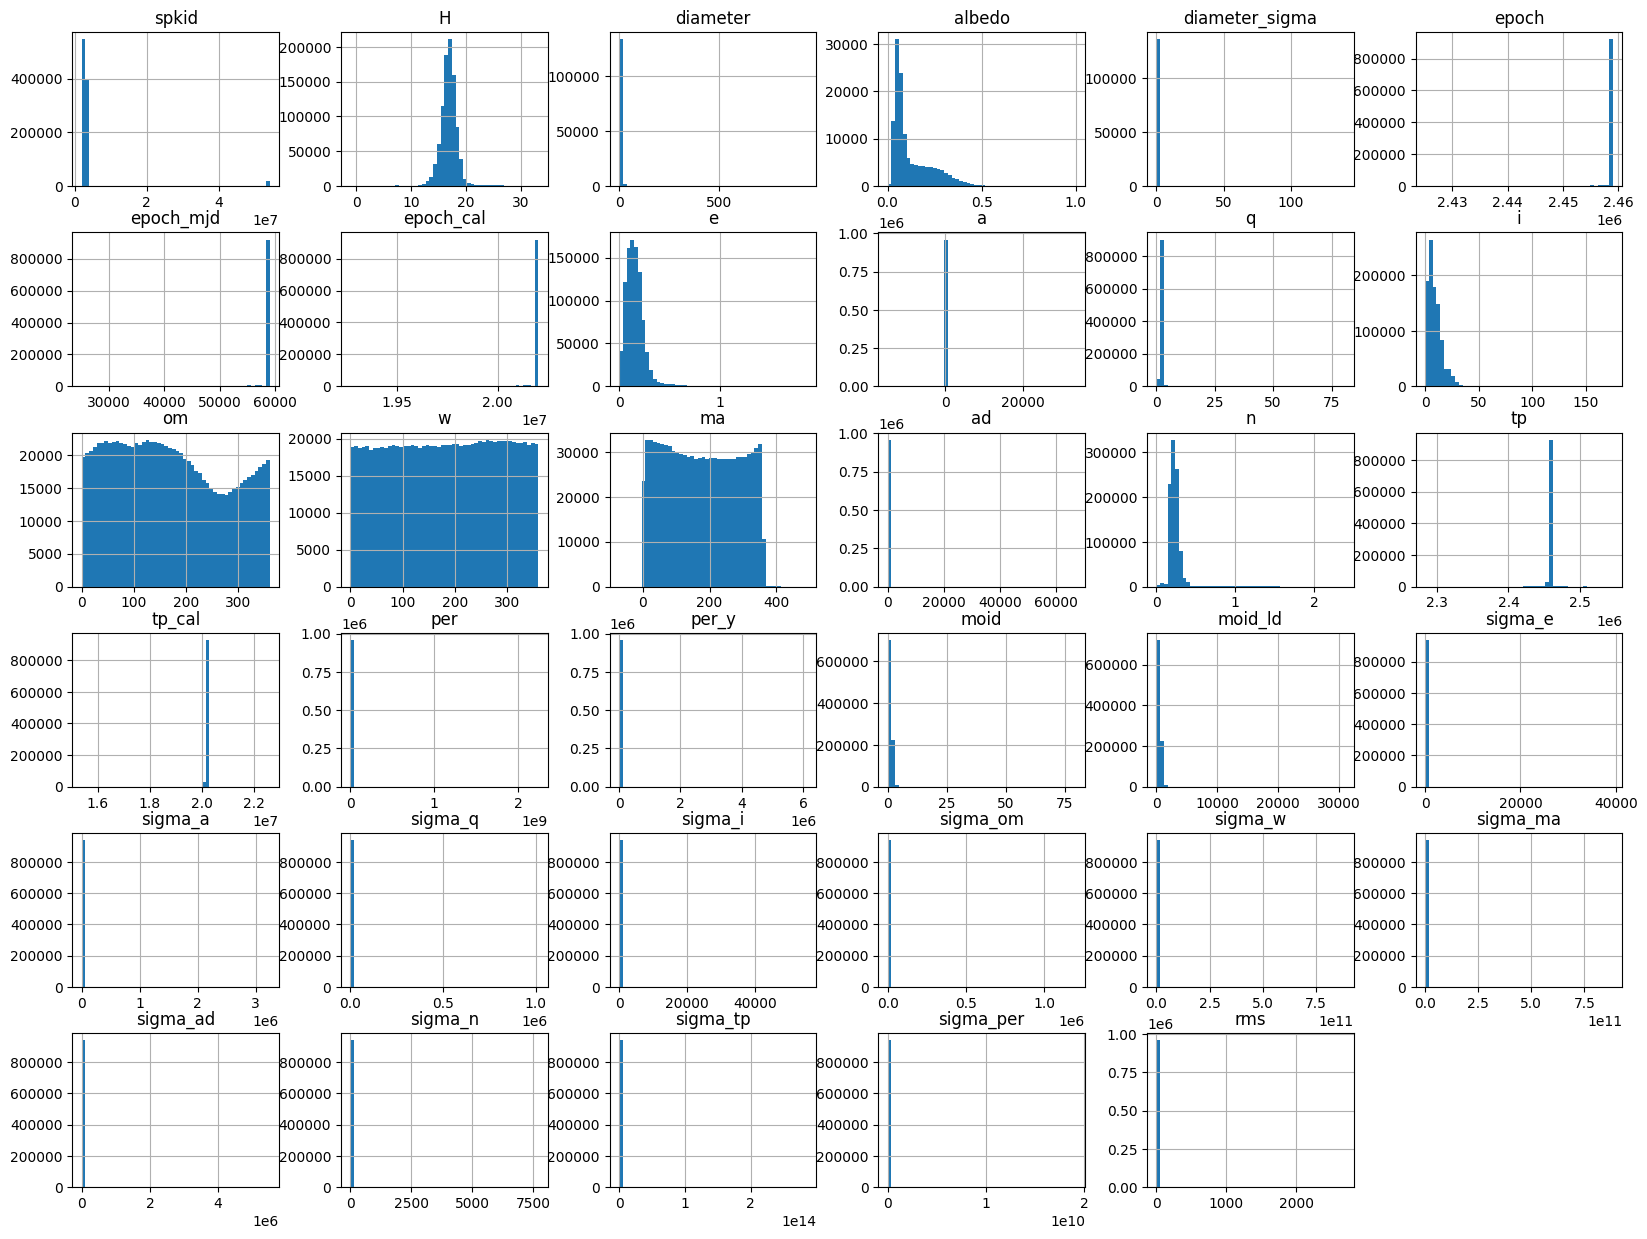

In [7]:
# overview of features' values and distributions
df.hist(bins=50, figsize=(20,15))

There are many unncessary features such as the id, and name that need to get excluded from the training process.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [9]:
df.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


In [10]:
df.isnull().mean()

,0
id,0.000000
spkid,0.000000
full_name,0.000000
pdes,0.000000
name,0.976981
prefix,0.999981
neo,0.000004
pha,0.020783
H,0.006534
diameter,0.857897


Text(0.5, 1.0, 'Percentage of Missing Values per Column')

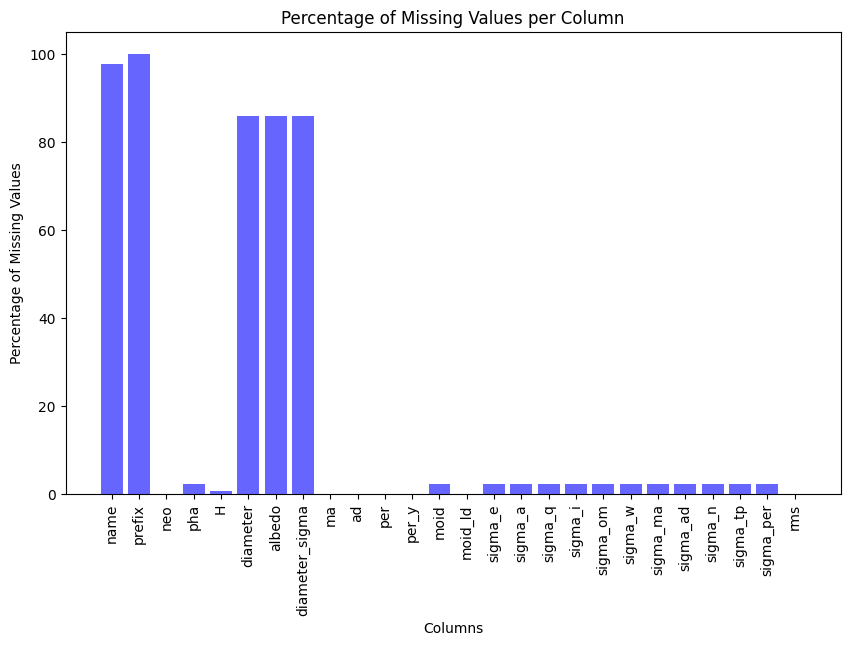

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]

plt.figure(figsize=(10, 6))
plt.bar(missing_percentage.index, missing_percentage.values, color='b', alpha=0.6)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.title("Percentage of Missing Values per Column")


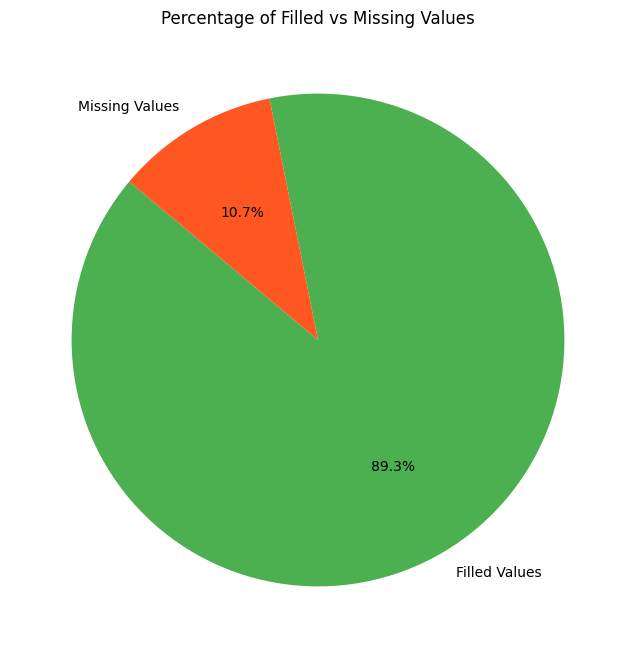

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

total_cells = df.size
missing_count = df.isnull().sum().sum()
filled_count = total_cells - missing_count

missing_percentage = (missing_count / total_cells) * 100
filled_percentage = (filled_count / total_cells) * 100

labels = ['Filled Values', 'Missing Values']
sizes = [filled_percentage, missing_percentage]

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#4CAF50', '#FF5722']
)
plt.title('Percentage of Filled vs Missing Values')
plt.show()


# **Clean Data**

In [13]:
# Check for duplicates
df.duplicated().sum()

0

## Remove irrelevent features

We will create a new cleaned data frame that has all unncessary features and missing data removed.

In [14]:
df["equinox"].unique() # it's the same value for all instances

array(['J2000'], dtype=object)

In [15]:
cleaned_df = df.drop(columns=["id", "spkid", "full_name", "pdes", "name", "prefix", "orbit_id", "equinox"], inplace=False)

In [16]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 37 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   neo             958520 non-null  object 
 1   pha             938603 non-null  object 
 2   H               952261 non-null  float64
 3   diameter        136209 non-null  float64
 4   albedo          135103 non-null  float64
 5   diameter_sigma  136081 non-null  float64
 6   epoch           958524 non-null  float64
 7   epoch_mjd       958524 non-null  int64  
 8   epoch_cal       958524 non-null  float64
 9   e               958524 non-null  float64
 10  a               958524 non-null  float64
 11  q               958524 non-null  float64
 12  i               958524 non-null  float64
 13  om              958524 non-null  float64
 14  w               958524 non-null  float64
 15  ma              958523 non-null  float64
 16  ad              958520 non-null  float64
 17  n         

## Clean the redundent 'epoch' feature
epoch, epoch_mjd, and epoch_cal are all different ways of representing the same point in time but on different scales or formats. epoch is the most percise one of the three so we can keep it and drop the other two.

epoch_mjd = epoch - 2400000.5

In [17]:
# Verify that epoch_mjd is a different scale of epoch
print((cleaned_df["epoch"] - 2400000.5 == cleaned_df["epoch_mjd"]).unique())

[ True]


In [18]:
cleaned_df.drop(columns=["epoch", "epoch_mjd"], inplace=True) # drop the redundent features

## Clean 'per' & 'per_y' features
Again per and per_y features are different scales of the same value.

In [19]:
df[df["per_y"].isna()]["class"]

,class
929462,HYA


In [20]:
# Fill missing values of per_y with the mean of the same class
mean = cleaned_df[cleaned_df["class"] == "HYA"]["per_y"].mean()
cleaned_df["per_y"].fillna(mean, inplace=True)

<ipython-input-20-c91eb7129383>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df["per_y"].fillna(mean, inplace=True)


In [21]:
# check that per and per_y features are different scales of each others
(df["per"] / df["per_y"]).dropna().round(4).unique() # round to 4 decimal places to ignore float impercision represntation

array([365.25])

In [22]:
cleaned_df.drop(columns=["per"], inplace=True)

## Clean 'moid' & 'moid_ld' features

moid & moid_ld are again two features that represent the same data in different scales. We observe that moid_ld has fewer nulls compared to moid so we will keep moid_ld and drop moid. The following code also checked for the posibility of deriving the moid from the moid_ld and vice versa but turns out that the moid_ld is not missing anywhere the moid is defined. Also the moid_ld is 0 wherever the moid is missing.

In [23]:
instances_with_null_moid_ld = df[df["moid"].isna() & ~df["moid_ld"].isna()]
instances_with_null_moid = df[~df["moid"].isna() & df["moid_ld"].isna()]

print(instances_with_null_moid_ld["moid_ld"].unique())
len(instances_with_null_moid), len(instances_with_null_moid_ld)

[0.]


(0, 19794)

In [24]:
cleaned_df.drop(columns=["moid"], inplace=True)

In [25]:
cleaned_df["moid_ld"].describe()

,moid_ld
count,958397.000000
mean,539.364207
std,834.306975
min,0.000000
25%,375.394939
50%,477.706175
75%,617.324804
max,30929.908422


In [26]:
classes_missing_moid_ld = cleaned_df[cleaned_df["moid_ld"].isna()]["class"].value_counts().reset_index()
classes_missing_moid_ld

,class,count
0,MBA,78
1,MCA,27
2,IMB,13
3,TNO,5
4,OMB,2
5,TJN,2


In [27]:
# Calculate the percantage of missing moid_ld for each class
classes_freq = cleaned_df["class"].value_counts().reset_index()
classes_freq.columns = ["class", "total_count"]
merged_df = pd.merge(classes_missing_moid_ld, classes_freq, how="left")
merged_df["missing_percentage"] = merged_df["count"] / merged_df["total_count"] * 100
merged_df

,class,count,total_count,missing_percentage
0,MBA,78,855954,0.009113
1,MCA,27,18685,0.144501
2,IMB,13,20360,0.063851
3,TNO,5,3468,0.144175
4,OMB,2,28355,0.007053
5,TJN,2,8221,0.024328


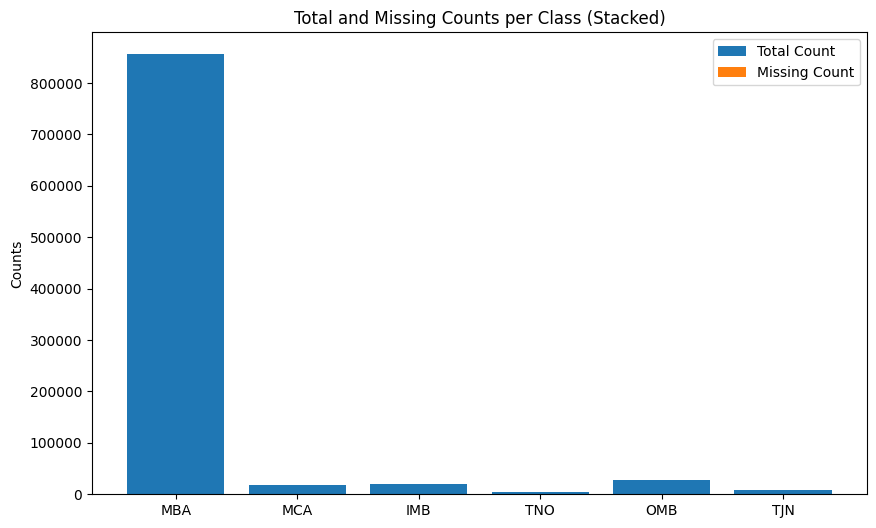

In [28]:
# Plot total instances of each class along with the missing value counts of moid_ld
plt.figure(figsize=(10, 6))
plt.bar(merged_df["class"], merged_df["total_count"], label="Total Count")
plt.bar(merged_df["class"], merged_df["count"], label="Missing Count")
plt.ylabel("Counts")
plt.title("Total and Missing Counts per Class (Stacked)")
plt.legend()
plt.show()

In [29]:
# The instances missing 'moid_ld' features are very small compared to the total instances
# count of the respective class, hence we can safely drop all instances missing 'moid_ld'
cleaned_df.dropna(subset=["moid_ld"], inplace=True)

## Encode 'class' feature

In [30]:
from sklearn.preprocessing import LabelEncoder

class_encoder = LabelEncoder()
encoded_class = class_encoder.fit_transform(cleaned_df["class"])
encoded_class

array([8, 8, 8, ..., 1, 8, 8])

In [31]:
print(f"categories: {class_encoder.classes_}")

categories: ['AMO' 'APO' 'AST' 'ATE' 'CEN' 'HYA' 'IEO' 'IMB' 'MBA' 'MCA' 'OMB' 'TJN'
 'TNO']


In [32]:
cleaned_df["class"] = encoded_class

In [33]:
import numpy as np

corr_matrix = cleaned_df.select_dtypes(np.number).corr()
corr_class = corr_matrix["class"].sort_values(ascending=False)
corr_class

,class
class,1.000000
q,0.304076
moid_ld,0.292012
diameter,0.151684
diameter_sigma,0.075382
epoch_cal,0.073593
tp_cal,0.027886
tp,0.027721
a,0.025772
sigma_q,0.021578


## Encode 'neo' & 'pha' features

NEO = Near-Earth Object<br/>
PHA = Potentially Hazardous Asteroid

### 'neo' feature

We only have four instances missing the neo feature and all four instances are of the same class (HYA). It also happens that this exact class (HYA) has only four instances :)


According to astrologists, an object is classified as a NEO if its closest approach to the Sun (perihelion distance which is 'q' feature in our dataset) is less than 1.3 astronomical units. Hence, we can compute the missing 'neo' values given the 'q' feature.

Sources:
- https://www.unoosa.org/oosa/sk/ourwork/topics/neos/index.html
- https://www.iau.org/public/themes/neo/
- https://cneos.jpl.nasa.gov/about/neo_groups.html

In [34]:
# Show the target classes with missing 'neo' value
cleaned_df[cleaned_df["neo"].isna()]["class"]

,class
741612,5
929462,5
946657,5
950563,5


In [35]:
# Show the count of HYA class in the dataset
cleaned_df[df["class"] == 'HYA'].shape[0]

<ipython-input-35-573f78c6e3ab>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_df[df["class"] == 'HYA'].shape[0]


4

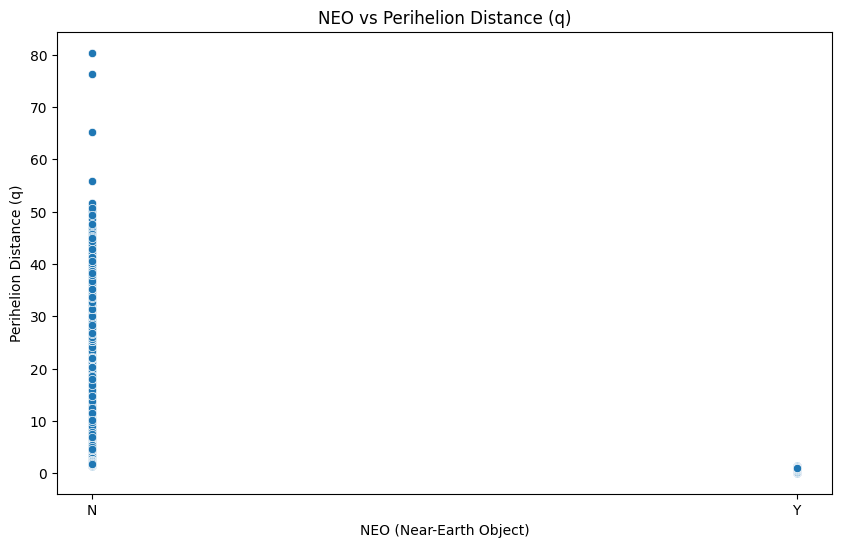

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='neo', y='q', data=df)
plt.title('NEO vs Perihelion Distance (q)')
plt.xlabel('NEO (Near-Earth Object)')
plt.ylabel('Perihelion Distance (q)')
plt.show()


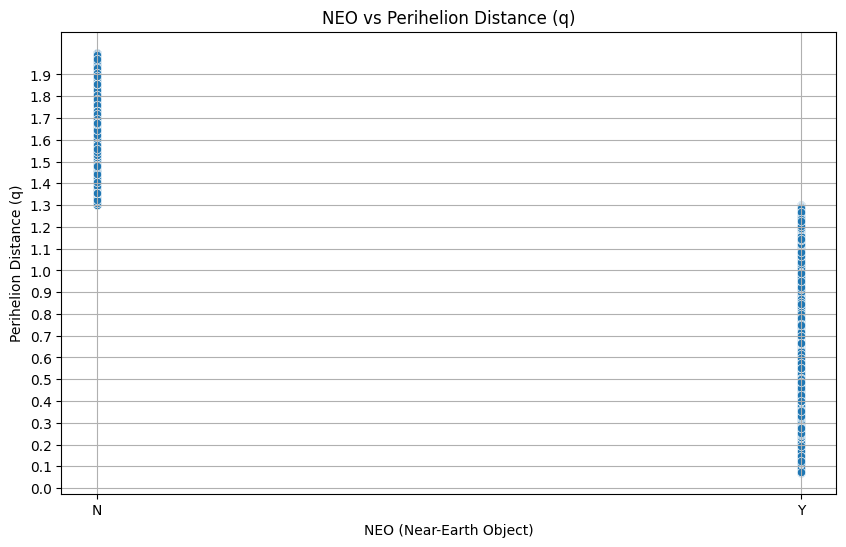

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))
sns.scatterplot(x='neo', y='q', data=df[df["q"] < 2])
plt.grid(True)
plt.title('NEO vs Perihelion Distance (q)')
plt.xlabel('NEO (Near-Earth Object)')
plt.ylabel('Perihelion Distance (q)')
plt.yticks(np.arange(0, 2, 0.1))
plt.show()

In [38]:
# Fill missing 'neo' values
def get_neo(row):
    return 'Y' if row['q'] < 1.3 else 'N'


cleaned_df['neo'] = cleaned_df.apply(lambda row: get_neo(row) if pd.isnull(row['neo']) else row['neo'], axis=1)

In [39]:
cleaned_df["neo"].unique()

array(['N', 'Y'], dtype=object)

In [40]:
cleaned_df[cleaned_df["class"] == 'HYA'][["neo", "q", "class"]]

,neo,q,class


In [41]:
# encode 'neo'
from sklearn.preprocessing import LabelEncoder

neo_encoder = LabelEncoder()
encoded_neo = neo_encoder.fit_transform(cleaned_df["neo"])
cleaned_df["neo"] = encoded_neo

### 'pha' feature

The dataset have many missing values for the 'pha' feature but luckily we can also derive this feature from either the 'moid' or the 'H' features.

**The following passage is quoted from Nasa's website:<br/>**
Potentially Hazardous Asteroids (PHAs) are currently defined based on parameters that measure the asteroid's potential to make threatening close approaches to the Earth. Specifically, all asteroids with an Earth Minimum Orbit Intersection Distance (MOID) of 0.05 au or less and an absolute magnitude (H) of 22.0 or less are considered PHAs.

Sources:
- https://cneos.jpl.nasa.gov/about/neo_groups.html

<Axes: >

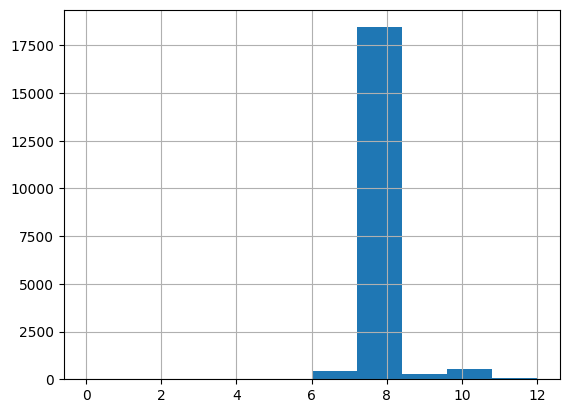

In [42]:
cleaned_df[cleaned_df["pha"].isna()]["class"].hist()

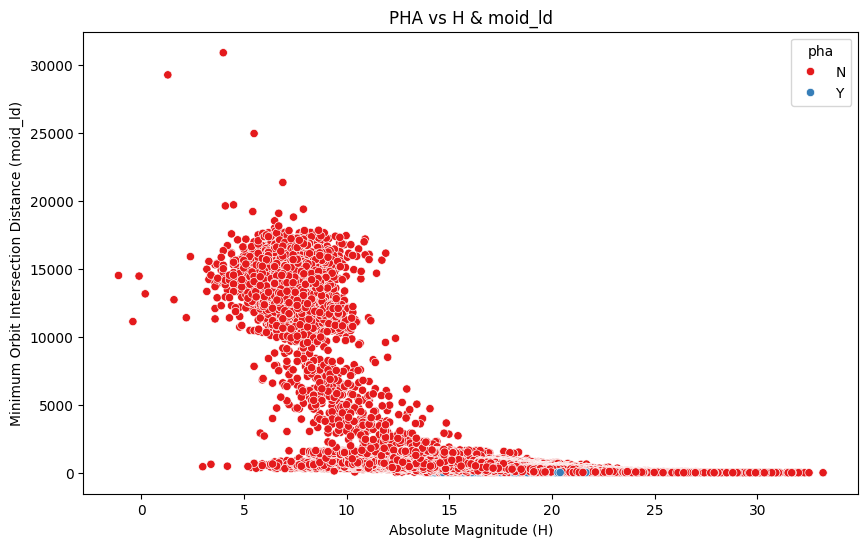

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

cleaned_df['pha'] = cleaned_df['pha']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='H', y='moid_ld', hue='pha', data=cleaned_df, palette='Set1')
plt.title('PHA vs H & moid_ld')
plt.xlabel('Absolute Magnitude (H)')
plt.ylabel('Minimum Orbit Intersection Distance (moid_ld)')
plt.show()

In [44]:
null_classes_series = cleaned_df[cleaned_df["pha"].isna()]["class"].value_counts().reset_index()
all_classes_series = cleaned_df["class"].value_counts().reset_index()
all_classes_series["count_missing"] = null_classes_series["count"]
all_classes_series

# sns.histplot(x="class", y="count", data=null_classes_series)
# sns.histplot(x="class", y="count", data=all_classes_series)

,class,count,count_missing
0,8,855876,18446.0
1,10,28353,538.0
2,7,20347,444.0
3,9,18658,302.0
4,1,12687,59.0
5,0,8457,2.0
6,11,8219,1.0
7,12,3463,1.0
8,3,1729,1.0
9,4,506,NaN


In [45]:
from sklearn.preprocessing import LabelEncoder

pha_encoder = LabelEncoder()
encoded_pha = pha_encoder.fit_transform(cleaned_df["pha"])
encoded_pha
set(encoded_pha)

{0, 1, 2}

In [46]:
cleaned_df["neo"] = encoded_neo
cleaned_df["pha"] = encoded_pha

In [47]:
pha_encoder.classes_

array(['N', 'Y', nan], dtype=object)

In [48]:
# replace all values of 2 to nans
cleaned_df["pha"].replace(2, np.nan, inplace=True)

<ipython-input-48-b3f53eeec062>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df["pha"].replace(2, np.nan, inplace=True)


In [49]:
# select relevant features
pha_corr = cleaned_df.corr()["pha"]

irrelevant_cols = []
for col in cleaned_df.columns:
  if np.abs(pha_corr[col]) < 0.03:
    irrelevant_cols.append(col)

impute_df = cleaned_df.drop(columns=irrelevant_cols).dropna()

In [50]:
impute_df.shape

(932341, 9)

In [51]:
from sklearn.model_selection import train_test_split

X = impute_df.drop(columns=["pha"])
y = impute_df["pha"].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# train imputer
from sklearn.ensemble import RandomForestClassifier

rf_clf_pha = RandomForestClassifier(
    max_depth=20,
    n_jobs=-1,
    random_state=42)
rf_clf_pha.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_jobs=-1, random_state=42)

In [53]:
y_pred = rf_clf_pha.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Weighted F1: {f1_score(y_test, y_pred, average='weighted')}")
print(f"Weighted F1: {f1_score(y_test, y_pred, average='macro')}")

Accuracy: 0.9999463717829773
Recall: 0.9881235154394299
Precision: 0.9881235154394299
Weighted F1: 0.9999463717829773
Weighted F1: 0.9940483203272141


In [55]:
# reset the index to ensure alignment with the row indices
cleaned_df.reset_index(drop=True, inplace=True)

# Llcate the indices of missing 'pha' values
missing_indices = np.where(cleaned_df["pha"].isna())[0]
tmp_df = cleaned_df.drop(columns=irrelevant_cols + ["pha"]).copy()

# predict & impute missing 'pha' values
y_pred_pha = rf_clf_pha.predict(tmp_df.iloc[missing_indices])
cleaned_df.loc[missing_indices, "pha"] = y_pred_pha

In [56]:
cleaned_df.iloc[missing_indices]["pha"].unique()

array([0., 1.])

## Correlation matrix heatmap

From the following correlation matrix we can observe that some features have a quite positive relation to the class feature (e.g. moid and q), and other features have a negative relation (e.g. n and H).

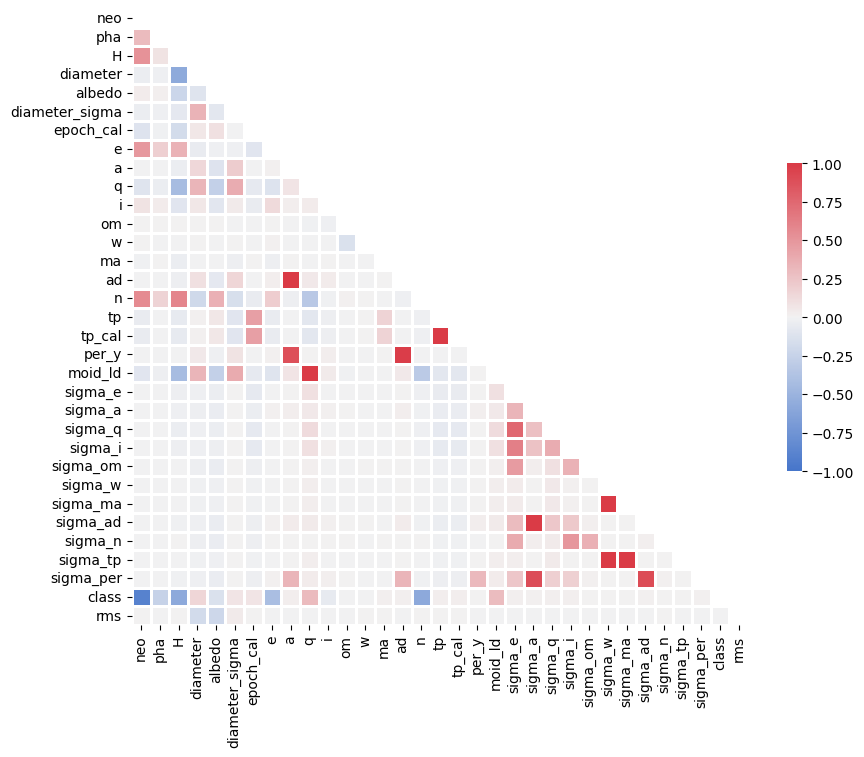

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr_matrix = cleaned_df.select_dtypes(np.number).corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(255, 10, as_cmap=True)

sns.heatmap(corr_matrix,
            mask=mask,
            cmap=cmap,
            vmax=1,
            vmin=-1,
            center=0,
            # annot=True,
            # fmt=".2f",
            square=True,
            linewidths=1,
            cbar_kws={"shrink": .5},)

plt.show()


## Drop sigma features

The sigma features represent the possible error margin in the calculation of the the feature they refer to. From the correlation matrix and the previous heatmap we can notice that the all the sigma features have very little to do if any at all with the target class feature. We have ten of them, hence, we can drop all of them, making the model much more simpler and much faster to train and iterate over.

In [58]:
for col in cleaned_df.columns:
    if col.startswith("sigma_"):
        cleaned_df.drop(columns=[col], inplace=True)

In [59]:
cleaned_df.drop(columns=["diameter_sigma"], inplace=True)

In [60]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958397 entries, 0 to 958396
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   neo        958397 non-null  int64  
 1   pha        958397 non-null  float64
 2   H          952135 non-null  float64
 3   diameter   136209 non-null  float64
 4   albedo     135103 non-null  float64
 5   epoch_cal  958397 non-null  float64
 6   e          958397 non-null  float64
 7   a          958397 non-null  float64
 8   q          958397 non-null  float64
 9   i          958397 non-null  float64
 10  om         958397 non-null  float64
 11  w          958397 non-null  float64
 12  ma         958396 non-null  float64
 13  ad         958393 non-null  float64
 14  n          958397 non-null  float64
 15  tp         958397 non-null  float64
 16  tp_cal     958397 non-null  float64
 17  per_y      958397 non-null  float64
 18  moid_ld    958397 non-null  float64
 19  class      958397 non-n

## Clean 'H' feature

In [61]:
# count missing values
classes_with_null_h = cleaned_df[cleaned_df["H"].isna()]["class"].value_counts().reset_index()
classes_with_null_h.columns = ["class", "missing_h_count"]
# classes_with_null_h

In [62]:
# count classes' frequinces
classes_frequencies = cleaned_df["class"].value_counts().reset_index()
classes_frequencies.columns = ["class", "total_count"]
# classes_frequencies

In [63]:
# merge the two df
merged_data = pd.merge(classes_with_null_h, classes_frequencies, how="left")
merged_data["missing_h_percentage"] = (merged_data["missing_h_count"] / merged_data["total_count"]) * 100
# merged_data

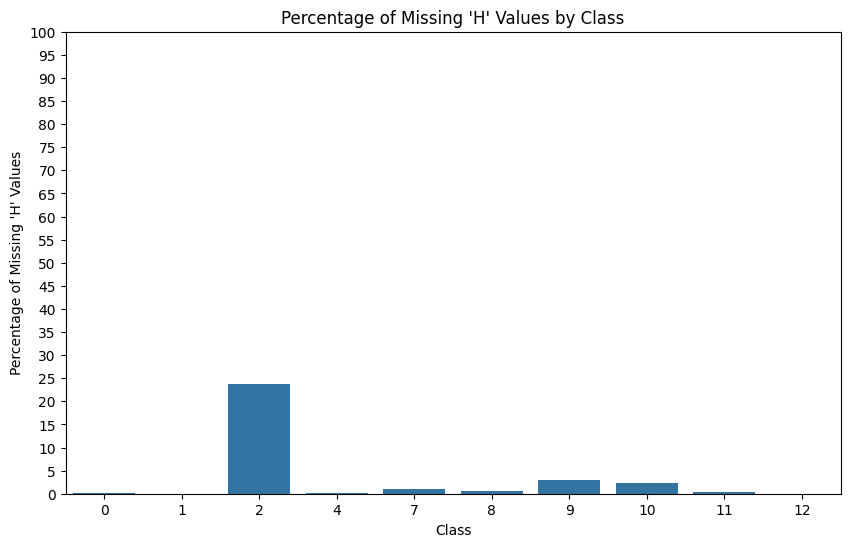

In [64]:
# plot missing h values with respect to class
plt.figure(figsize=(10, 6))
sns.barplot(x="class", y="missing_h_percentage", data=merged_data)
plt.yticks(np.arange(0, 101, 5))
plt.xlabel("Class")
plt.ylabel("Percentage of Missing 'H' Values")
plt.title("Percentage of Missing 'H' Values by Class")
plt.show()

In [65]:
# prepare X & y sets
impute_df = cleaned_df.dropna(subset=cleaned_df.columns.difference(["albedo", "diameter"])).copy()
X = impute_df.drop(columns=["H"])
y = impute_df["H"].tolist()

In [66]:
# filter features to train for the H imputer
h_corr = impute_df.corr()["H"]

irrelevant_cols = ["albedo", "diameter"]
for col in impute_df.columns:
  if np.abs(h_corr[col]) < 0.04:
    irrelevant_cols.append(col)

X.drop(columns=irrelevant_cols, inplace=True)

In [67]:
X.shape

(952129, 11)

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
from sklearn.ensemble import RandomForestRegressor

rf_H_reg = RandomForestRegressor(
    max_depth=20,
    n_jobs=-1,
    random_state=42,)
rf_H_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_jobs=-1, random_state=42)

In [70]:
y_pred = rf_H_reg.predict(X_test)

In [71]:
# The mean and std of the predicted values seem to align with the original
# values
df["H"].describe(), y_pred.mean(), y_pred.std()

(count    952261.000000
 mean         16.906411
 std           1.790405
 min          -1.100000
 25%          16.100000
 50%          16.900000
 75%          17.714000
 max          33.200000
 Name: H, dtype: float64,
 16.90205942539827,
 1.4161785696749576)

In [72]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, accuracy_score

print(f"RMSE: {root_mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

RMSE: 1.1044886501265467
MAE: 0.8338626945544276


In [73]:
# reset the index to ensure alignment with the row indices
cleaned_df.reset_index(drop=True, inplace=True)

# locate the indices of missing 'H' values
missing_indices = np.where(cleaned_df["H"].isna())[0]
tmp_df = cleaned_df.drop(columns=irrelevant_cols + ["H"]).copy()

# predict & impute missing 'H' values
y_pred_H = rf_H_reg.predict(tmp_df.iloc[missing_indices])
cleaned_df.loc[missing_indices, "H"] = y_pred_H

In [74]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958397 entries, 0 to 958396
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   neo        958397 non-null  int64  
 1   pha        958397 non-null  float64
 2   H          958397 non-null  float64
 3   diameter   136209 non-null  float64
 4   albedo     135103 non-null  float64
 5   epoch_cal  958397 non-null  float64
 6   e          958397 non-null  float64
 7   a          958397 non-null  float64
 8   q          958397 non-null  float64
 9   i          958397 non-null  float64
 10  om         958397 non-null  float64
 11  w          958397 non-null  float64
 12  ma         958396 non-null  float64
 13  ad         958393 non-null  float64
 14  n          958397 non-null  float64
 15  tp         958397 non-null  float64
 16  tp_cal     958397 non-null  float64
 17  per_y      958397 non-null  float64
 18  moid_ld    958397 non-null  float64
 19  class      958397 non-n

In [75]:
cleaned_df["H"].describe()

,H
count,958397.000000
mean,16.910289
std,1.786607
min,-1.100000
25%,16.100000
50%,16.900000
75%,17.732000
max,33.200000


## Other features with few missing values

### 'rms' feature

In [76]:
cleaned_df[cleaned_df["rms"].isna()].shape[0], cleaned_df[cleaned_df["class"] == 12].shape[0]

(1, 3463)

In [77]:
# We have plently of instances for class 12 so we can delete the only instance that is missing 'rms'
cleaned_df.dropna(subset=["rms"], inplace=True)

### 'ma' feature

In [78]:
# We have only one instance missing 'ma' and the class has enough instances
missing = cleaned_df[cleaned_df["ma"].isna()]["class"]
missing

,class
558429,12


In [79]:
len(cleaned_df[cleaned_df["class"] == 12])

3462

In [80]:
cleaned_df.dropna(subset=["ma"], inplace=True)

### 'ad' feature

ad' is missing for all instances of class 5 which are just 4 instances. Luckily we can deduce it from the values of 'a' & 'e' features given this formula: ad = a * (1 + e).

Source: https://socratic.org/questions/how-is-the-semi-major-axis-found-if-perihelion-and-aphelion-distance-are-known

In [81]:
missing = cleaned_df[cleaned_df["ad"].isna()]["class"]
missing

,class
741587,5
929336,5
946530,5
950436,5


In [82]:
cleaned_df[cleaned_df["ad"].isna()]["class"]

,class
741587,5
929336,5
946530,5
950436,5


In [83]:
(cleaned_df["ad"].round(2) == (cleaned_df["a"] * (1 + cleaned_df["e"])).round(2)).value_counts()

,count
True,958391
False,4


In [84]:
# Check the formula ad = a * (1 + e) actually holds
tmp = cleaned_df.dropna(subset=["e", "a", "ad"]).copy()
calculated_ad = tmp["a"] * (1 + tmp["e"])
tmp["calculated_ad"] = calculated_ad
tmp["diff"] = np.abs(tmp["calculated_ad"] - tmp["ad"])
tolerance = 1e-5
tmp[tmp["diff"] > tolerance].shape[0] # we verify that the formula is valid

0

In [85]:
def calculate_ad(row):
    # ad = a * (1 + e)
    return row['a'] * (1 + row['e'])

cleaned_df['ad'] = cleaned_df.apply(lambda row: calculate_ad(row) if pd.isnull(row['ad']) else row['ad'], axis=1)

In [86]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958395 entries, 0 to 958396
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   neo        958395 non-null  int64  
 1   pha        958395 non-null  float64
 2   H          958395 non-null  float64
 3   diameter   136209 non-null  float64
 4   albedo     135103 non-null  float64
 5   epoch_cal  958395 non-null  float64
 6   e          958395 non-null  float64
 7   a          958395 non-null  float64
 8   q          958395 non-null  float64
 9   i          958395 non-null  float64
 10  om         958395 non-null  float64
 11  w          958395 non-null  float64
 12  ma         958395 non-null  float64
 13  ad         958395 non-null  float64
 14  n          958395 non-null  float64
 15  tp         958395 non-null  float64
 16  tp_cal     958395 non-null  float64
 17  per_y      958395 non-null  float64
 18  moid_ld    958395 non-null  float64
 19  class      958395 non-null  

### 'albedo' feature

In [87]:
impute_df = cleaned_df.dropna().copy()
impute_df.drop(columns=["diameter"], inplace=True)
X = impute_df.copy()
y = impute_df["albedo"].tolist()

In [88]:
albedo_corr = impute_df.corr()["albedo"]
irrelevant_cols = ["albedo"]
for col in impute_df.columns:
  if np.abs(albedo_corr[col]) < 0.05:
    irrelevant_cols.append(col)

X.drop(columns=irrelevant_cols, inplace=True)

In [89]:
X.shape

(135100, 12)

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
from sklearn.ensemble import RandomForestRegressor

rf_reg_albedo = RandomForestRegressor(
    n_jobs=-1,
    random_state=42)
rf_reg_albedo.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [92]:
y_pred = rf_reg_albedo.predict(X_test)

In [93]:
rf_reg_albedo.score(X_test, y_test)

0.5561673592390051

In [94]:
root_mean_squared_error(y_test, y_pred)

0.0738857154258792

In [95]:
# reset the index to ensure alignment with the row indices
cleaned_df.reset_index(drop=True, inplace=True)

# locate the indices of missing 'albedo' values
missing_indices = np.where(cleaned_df["albedo"].isna())[0]
tmp_df = cleaned_df.drop(columns=irrelevant_cols + ["albedo", "diameter"]).copy()

# predict & impute missing 'albedo' values
y_pred_albedo = rf_reg_albedo.predict(tmp_df.iloc[missing_indices])
cleaned_df.loc[missing_indices, "albedo"] = y_pred_albedo

In [96]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958395 entries, 0 to 958394
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   neo        958395 non-null  int64  
 1   pha        958395 non-null  float64
 2   H          958395 non-null  float64
 3   diameter   136209 non-null  float64
 4   albedo     958395 non-null  float64
 5   epoch_cal  958395 non-null  float64
 6   e          958395 non-null  float64
 7   a          958395 non-null  float64
 8   q          958395 non-null  float64
 9   i          958395 non-null  float64
 10  om         958395 non-null  float64
 11  w          958395 non-null  float64
 12  ma         958395 non-null  float64
 13  ad         958395 non-null  float64
 14  n          958395 non-null  float64
 15  tp         958395 non-null  float64
 16  tp_cal     958395 non-null  float64
 17  per_y      958395 non-null  float64
 18  moid_ld    958395 non-null  float64
 19  class      958395 non-n

### 'diameter' feature

In [97]:
impute_df = cleaned_df.dropna()
X = impute_df.copy()
y = impute_df["diameter"].tolist()

In [98]:
diameter_corr = impute_df.corr()["diameter"]
irrelevant_cols = ["diameter"]
for col in impute_df.columns:
  if np.abs(diameter_corr[col]) < 0.05:
    irrelevant_cols.append(col)

X.drop(columns=irrelevant_cols, inplace=True)

In [99]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136209 entries, 0 to 909371
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   H          136209 non-null  float64
 1   albedo     136209 non-null  float64
 2   epoch_cal  136209 non-null  float64
 3   e          136209 non-null  float64
 4   a          136209 non-null  float64
 5   q          136209 non-null  float64
 6   i          136209 non-null  float64
 7   ad         136209 non-null  float64
 8   n          136209 non-null  float64
 9   per_y      136209 non-null  float64
 10  moid_ld    136209 non-null  float64
 11  class      136209 non-null  int64  
 12  rms        136209 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 14.5 MB


In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
from sklearn.ensemble import RandomForestRegressor

rf_reg_diameter = RandomForestRegressor(
    n_jobs=-1,
    random_state=42)
rf_reg_diameter.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [102]:
y_pred = rf_reg_diameter.predict(X_test)

In [103]:
root_mean_squared_error(y_train, rf_reg_diameter.predict(X_train))

0.7042698344942773

In [104]:
root_mean_squared_error(y_test, y_pred)

2.7696804580894785

In [105]:
cleaned_df["diameter"].describe()

,diameter
count,136209.000000
mean,5.506429
std,9.425164
min,0.002500
25%,2.780000
50%,3.972000
75%,5.765000
max,939.400000


In [106]:
# reset the index to ensure alignment with the row indices
cleaned_df.reset_index(drop=True, inplace=True)

# locate the indices of missing 'diameter' values
missing_indices = np.where(cleaned_df["diameter"].isna())[0]
tmp_df = cleaned_df.drop(columns=irrelevant_cols + ["diameter"]).copy()

# predict & impute missing 'diameter' values
y_pred_diameter = rf_reg_diameter.predict(tmp_df.iloc[missing_indices])
cleaned_df.loc[missing_indices, "diameter"] = y_pred_diameter

In [107]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958395 entries, 0 to 958394
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   neo        958395 non-null  int64  
 1   pha        958395 non-null  float64
 2   H          958395 non-null  float64
 3   diameter   958395 non-null  float64
 4   albedo     958395 non-null  float64
 5   epoch_cal  958395 non-null  float64
 6   e          958395 non-null  float64
 7   a          958395 non-null  float64
 8   q          958395 non-null  float64
 9   i          958395 non-null  float64
 10  om         958395 non-null  float64
 11  w          958395 non-null  float64
 12  ma         958395 non-null  float64
 13  ad         958395 non-null  float64
 14  n          958395 non-null  float64
 15  tp         958395 non-null  float64
 16  tp_cal     958395 non-null  float64
 17  per_y      958395 non-null  float64
 18  moid_ld    958395 non-null  float64
 19  class      958395 non-n

#**Visualize Data**

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

## Target Class Distribution
The dataset is highly skewed and class 8 has the most instances.

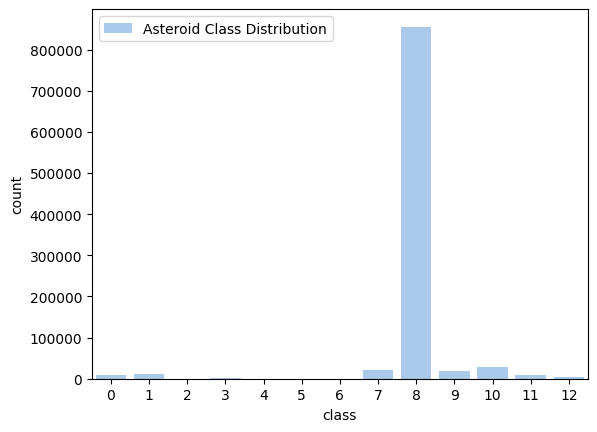

In [109]:
freq = cleaned_df["class"].value_counts().reset_index()

sns.set_color_codes("pastel")
sns.barplot(x="class", y="count", data=freq,
            label='Asteroid Class Distribution', color="b")

plt.show()

## Albedo & Diameter & Class
- Albedo: represents the reflectivity of the asteroids where higher albedo values mean more reflectivity, while lower values indicate darker surfaces.
- Diameter: shows the size of the asteroids.

Most ateroids seem to have diameter below about 300 with some instances of outliers going up to 1000. We have 9 instances that have diameter larger than 300 so we will drop them.

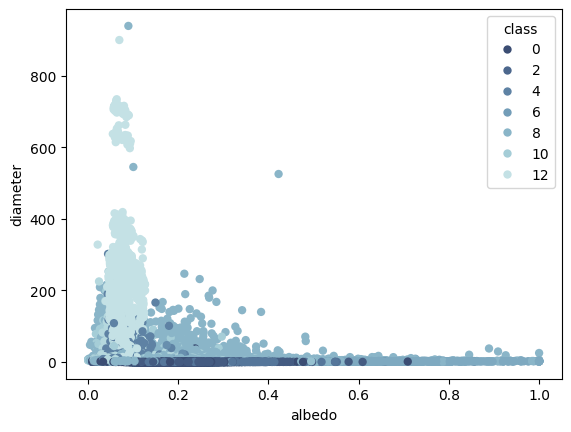

In [110]:
sns.scatterplot(
    x="albedo",
    y="diameter",
    hue="class",
    palette="ch:r=-.2,d=.3_r",
    sizes=(1, 8),
    linewidth=0,
    data=cleaned_df)

plt.show()

In [111]:
cleaned_df["class"].value_counts()

,count
class,
8,855876
10,28353
7,20347
9,18658
1,12687
0,8457
11,8219
12,3461
3,1729


In [112]:
cleaned_df[cleaned_df["diameter"] > 790].shape[0]

2

In [113]:
cleaned_df.shape

(958395, 21)

In [114]:
outlier_indcies = np.where(cleaned_df["diameter"] > 790)[0]
cleaned_df.drop(index=outlier_indcies, inplace=True)

In [115]:
cleaned_df.shape

(958393, 21)

# **Train ML models**

## Helper Functions

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y):
  train_sizes, train_scores, test_scores = learning_curve(
      model,
      X,
      y,
      cv=5,
      scoring="f1_weighted",
      n_jobs=-1,
      train_sizes=np.linspace(0.1, 1.0, 10)
  )

  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  plt.figure(figsize=(10, 6))
  plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
  plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-validation score")
  plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
  plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)
  plt.xlabel("Training examples")
  plt.ylabel("Score")
  plt.title("Learning Curve")
  plt.legend(loc="best")
  plt.grid()
  plt.show()

In [179]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from itertools import cycle

def plot_roc_curve(model):
  colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple',
                  'brown', 'pink', 'gray', 'olive', 'cyan', 'teal', 'gold', 'blue'])

  plt.figure(figsize=(10, 8))

  for c, color in zip(range(14), colors):
      y_train_tmp = (y_train == c).astype(int)
      # y_scores_dt = cross_val_predict(model, X_train, y_train_tmp, cv=3)
      y_scores = model.predict_proba(X_train)[:, 1]
      fpr, tpr, thresholds = roc_curve(y_train_tmp, y_scores)
      plt.plot(fpr, tpr, color=color, linewidth=2, label=f'Class {c} ROC curve')

  plt.xlabel('False Positive Rate (Fall-Out)')
  plt.ylabel('True Positive Rate (Recall)')
  plt.title("ROC Curves for Each Class")
  plt.grid()
  plt.axis([0, 1, 0, 1])
  plt.legend(loc="lower right", fontsize=10)
  plt.show()


In [117]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, precision_recall_curve

def evaluate_model(y_true, y_pred, print_scores=True):
  metrics = {
    "accuracy": accuracy_score(y_true, y_pred),
    "recall weighted": recall_score(y_true, y_pred, average="weighted"),
    "recall macro": recall_score(y_true, y_pred, average="macro"),
    "percision weighted": precision_score(y_true, y_pred, average="weighted"),
    "percision macro": precision_score(y_true, y_pred, average="macro"),
    "f1 score weighted": f1_score(y_true, y_pred, average="weighted"),
    "f1 score macro": f1_score(y_true, y_pred, average="macro"),
  }

  if print_scores:
    print("======================== METRICS ========================")
    for k, v in metrics.items():
      print(f"{k}: {v}")
    print("=========================================================")

  return metrics

In [118]:
class_corr = cleaned_df.corr()["class"]
irrelevant_cols = []
for col in cleaned_df.columns:
  if np.abs(class_corr[col]) < 0.02:
    irrelevant_cols.append(col)

train_df = cleaned_df.drop(columns=irrelevant_cols)

In [ ]:
train_df.shape

In [119]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns=["class"]).copy()
y = train_df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [120]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((766714, 14), (191679, 14), (766714,), (191679,))

## Models

### Dummy Classifier

In [121]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)

DummyClassifier()

In [122]:
y_pred_dummy = dummy_clf.predict(X_test)

In [123]:
_ = evaluate_model(y_test, y_pred_dummy)

======================== METRICS ========================
accuracy: 0.8930294920152964
recall weighted: 0.8930294920152964
recall macro: 0.07692307692307693
percision weighted: 0.7975016736090983
percision macro: 0.06869457630886895
f1 score weighted: 0.8425665600804642
f1 score macro: 0.07257634030385605


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


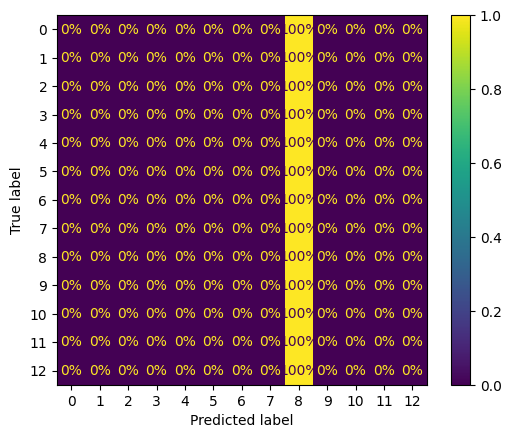

In [124]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_dummy,
    normalize="true",
    values_format=".0%",)

### Random Forest

In [125]:
# from sklearn.model_selection import GridSearchCV

# params = {
#     "max_features": [2, 4, 6, 8, 10, 12, 14, 16, 18, 'sqrt', 'auto'],
#     "max_depth": [10, 15, 20, 25, 30],
#     "n_estimators": [100, 150, 200, 250, 300, 350, 400, 450],
#     "bootstrap": [True, False],
#     "criterion": ["gini", "entropy", "log_loss"],

# }

# grid_search = GridSearchCV(
#     RandomForestClassifier(random_state=42),
#     params,
#     scoring="f1_macro",
#     verbose=0)

# grid_search.fit(X, y)
# grid_search.best_params

In [126]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    max_depth=25,
    n_estimators=290,
    n_jobs=-1,
    random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, n_estimators=290, n_jobs=-1,
                       random_state=42)

In [127]:
y_pred_rf = rf_clf.predict(X_test)

In [128]:
_ = evaluate_model(y_test, y_pred_rf)

======================== METRICS ========================
accuracy: 0.9999739147220091
recall weighted: 0.9999739147220091
recall macro: 0.942196082409247
percision weighted: 0.9999741016883804
percision macro: 0.9985657269231363
f1 score weighted: 0.99996926442802
f1 score macro: 0.9530698863873585


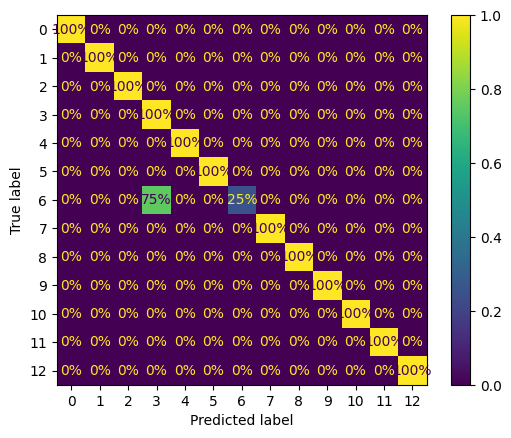

In [129]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_rf,
    normalize="true",
    values_format=".0%",)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


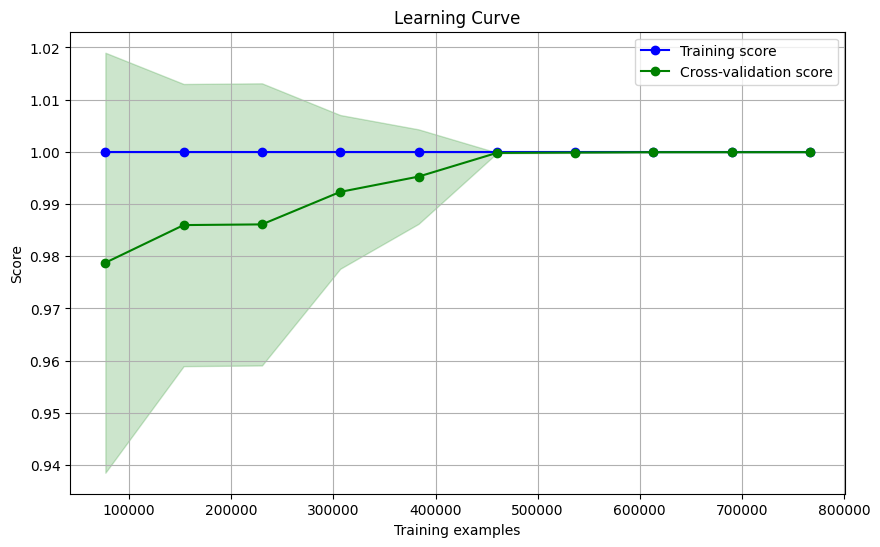

In [130]:
plot_learning_curve(rf_clf, X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


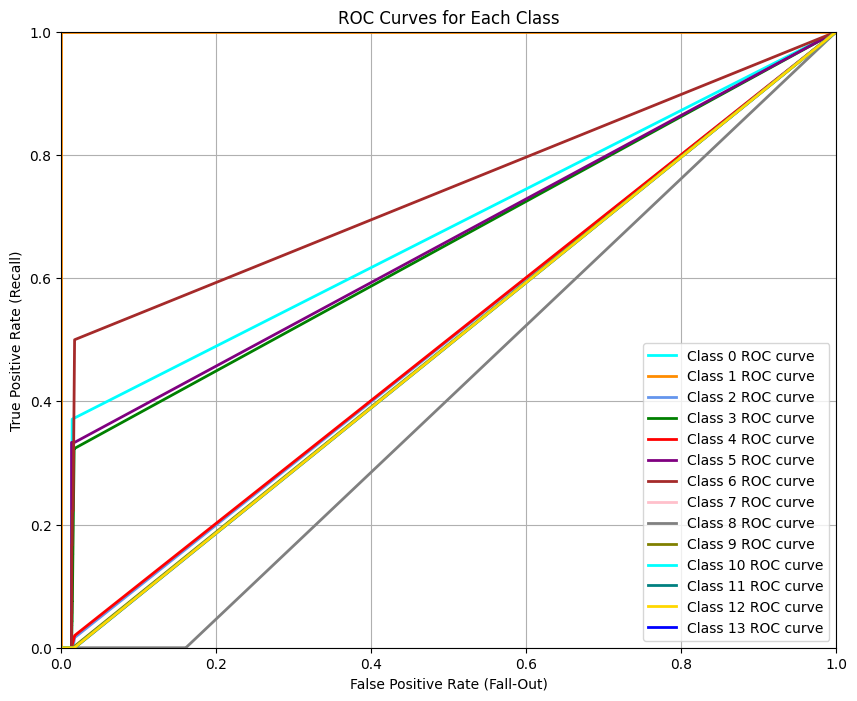

In [185]:
plot_roc_curve(rf_clf)

### Catboost

In [132]:
from catboost import CatBoostClassifier

cat_clf = CatBoostClassifier(task_type="GPU")
cat_clf.fit(X_train, y_train, verbose=0)

In [133]:
y_pred_cat = cat_clf.predict(X_test)

In [134]:
_ = evaluate_model(y_test, y_pred_cat)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


======================== METRICS ========================
accuracy: 0.9929830602204728
recall weighted: 0.9929830602204728
recall macro: 0.7548264972517835
percision weighted: 0.9929430420711511
percision macro: 0.8074403779683987
f1 score weighted: 0.992923294531591
f1 score macro: 0.7746578295155884


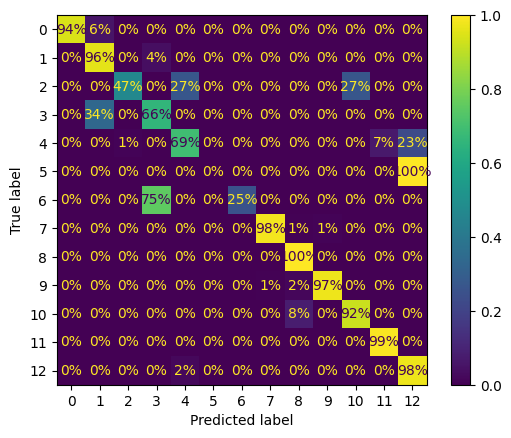

In [135]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_cat,
    normalize="true",
    values_format=".0%",)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


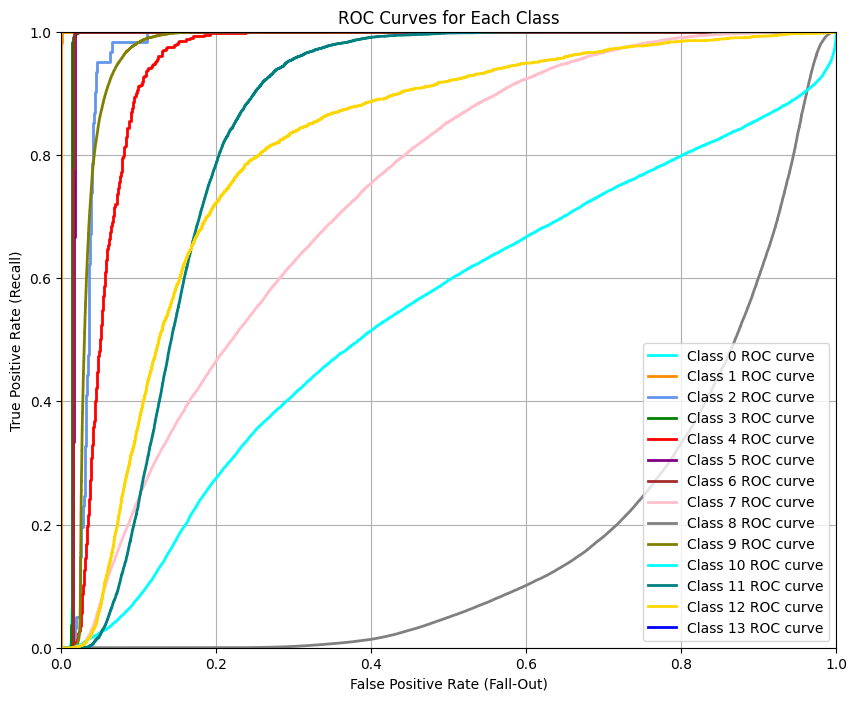

In [184]:
plot_roc_curve(cat_clf)

### XGBoost

In [136]:
from xgboost import XGBRFClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

xgb_clf = XGBRFClassifier(
    tree_method="hist",
    device="cuda")
xgb_clf.fit(X_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device='cuda',
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='multi:softprob',
                random_state=None, reg_alpha=None, ...)

In [137]:
y_pred_xgb = xgb_clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:56:29] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [138]:
_ = evaluate_model(y_test, y_pred_xgb)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


======================== METRICS ========================
accuracy: 0.9969375883638792
recall weighted: 0.9969375883638792
recall macro: 0.728465888948855
percision weighted: 0.9969861989317864
percision macro: 0.8090132035628675
f1 score weighted: 0.9968959675168214
f1 score macro: 0.7359842411931395


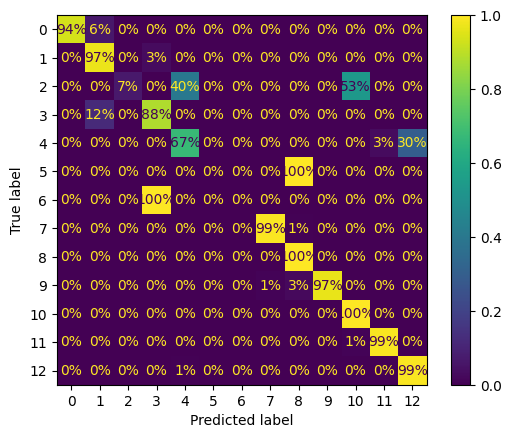

In [139]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_xgb,
    normalize="true",
    values_format=".0%",)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


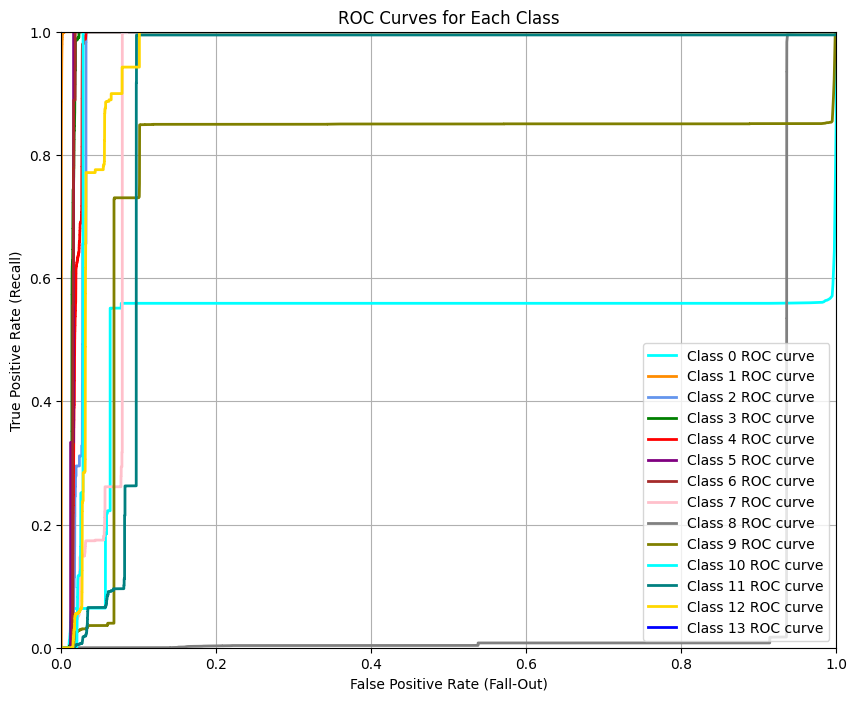

In [182]:
plot_roc_curve(xgb_clf)

### KNN

In [140]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(
    n_jobs=-1,
    n_neighbors=7,)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=7)

In [141]:
y_pred_knn = knn_clf.predict(X_test)

In [142]:
_ = evaluate_model(y_test, y_pred_knn)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


======================== METRICS ========================
accuracy: 0.9529160732265923
recall weighted: 0.9529160732265923
recall macro: 0.5019561229307379
percision weighted: 0.9482897750121496
percision macro: 0.5771610991177574
f1 score weighted: 0.9465867595085586
f1 score macro: 0.5222001976924594


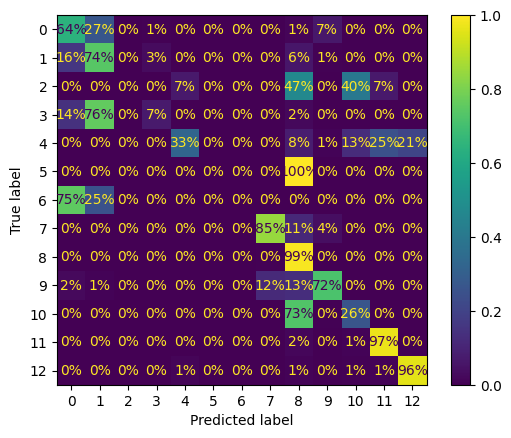

In [143]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_knn,
    normalize="true",
    values_format=".0%",)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


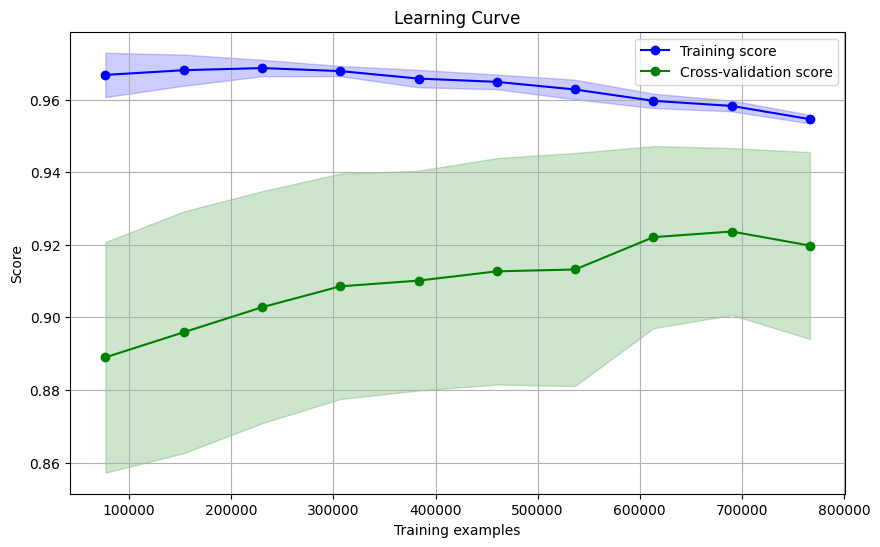

In [144]:
plot_learning_curve(knn_clf, X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


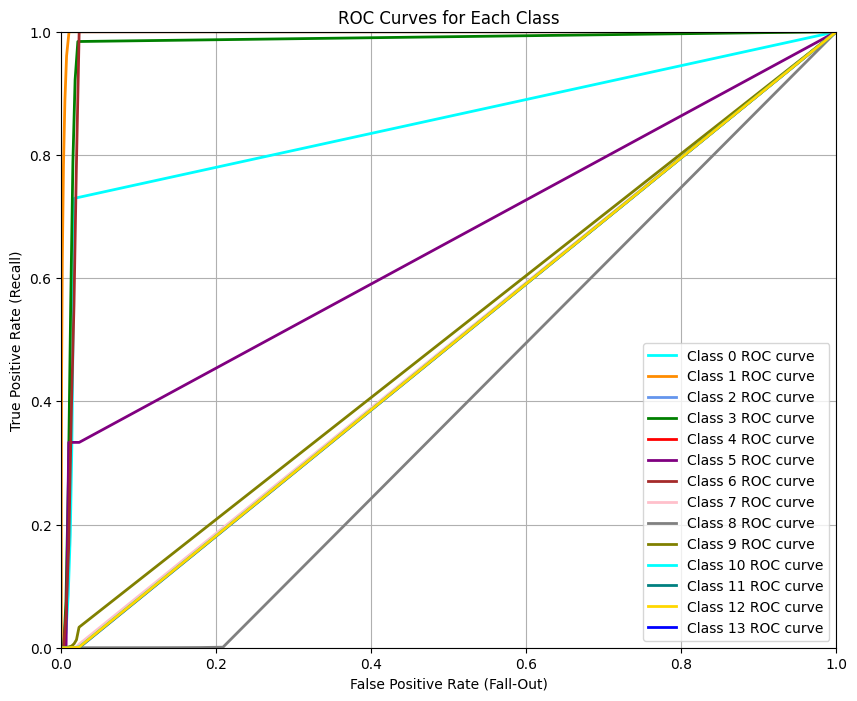

In [181]:
plot_roc_curve(knn_clf)

### Decision Tree

In [146]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [147]:
y_pred_dt = dt_clf.predict(X_test)

In [148]:
_ = evaluate_model(y_test, y_pred_dt)

======================== METRICS ========================
accuracy: 0.9999582635552147
recall weighted: 0.9999582635552147
recall macro: 0.942114829677194
percision weighted: 0.9999584782391187
percision macro: 0.9984294995141816
f1 score weighted: 0.9999536177900233
f1 score macro: 0.9529610726132458


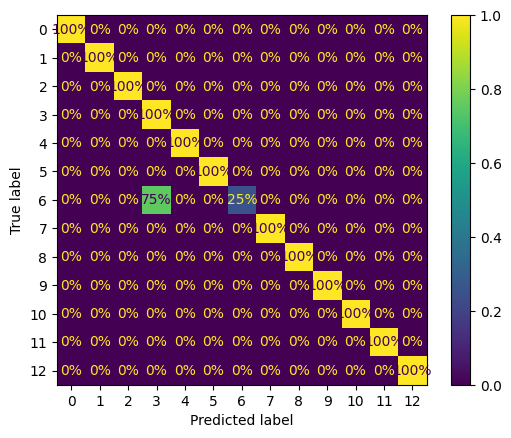

In [149]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_dt,
    normalize="true",
    values_format=".0%",)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


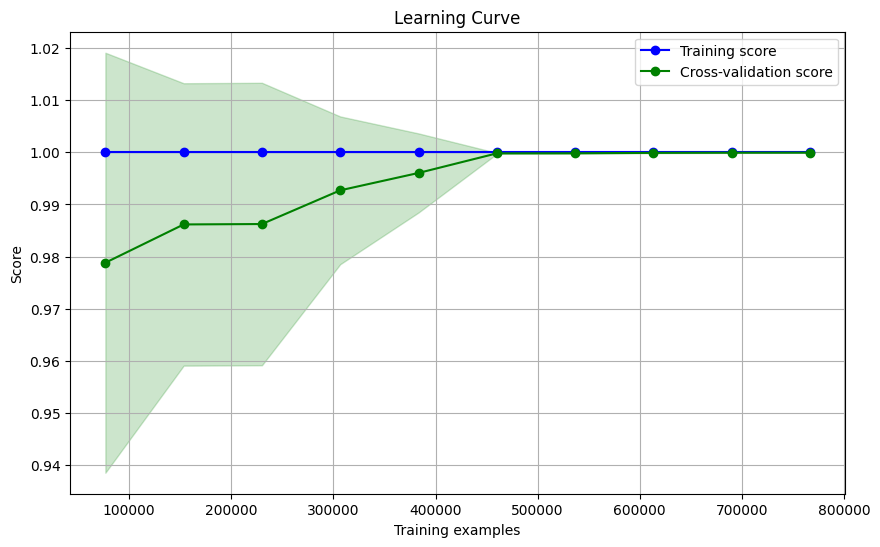

In [150]:
plot_learning_curve(dt_clf, X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


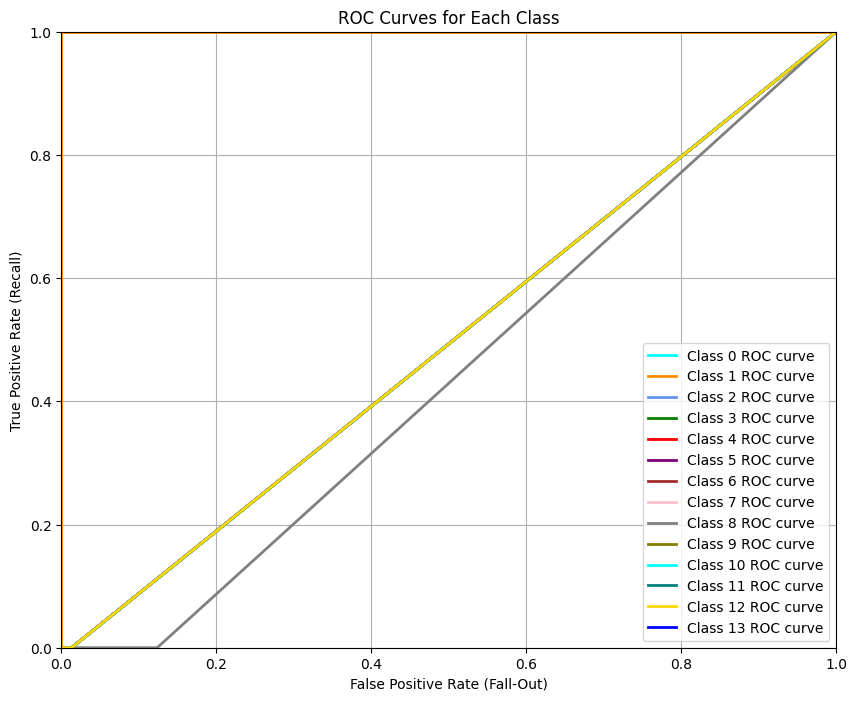

In [180]:
plot_roc_curve(dt_clf)

## Custom Asteroids Classifier

In [152]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

class AsteroidClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, main_model, binary_model):
        self.main_model = main_model
        self.binary_model = binary_model

    def fit(self, X, y):
        self.main_model.fit(X, y)
        y_binary = (y == 6).astype(int)
        self.binary_model.fit(X, y_binary)

        return self

    def predict(self, X):
      main_predictions = self.main_model.predict(X)
      class_3_indices = np.where(main_predictions == 3)[0]
      if len(class_3_indices) > 0:
          try:
            binary_predictions = self.binary_model.predict(X.iloc[class_3_indices])
            main_predictions[class_3_indices] = np.where(binary_predictions == 1, 6, main_predictions[class_3_indices])
          except Exception as e:
              print(f"Error accessing indices: {e}")

      return main_predictions



In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

ast_clf = AsteroidClassifier(
  DecisionTreeClassifier(random_state=42),
  make_pipeline(
    StandardScaler(),
    SVC(degree=3, kernel="poly"))
)

ast_clf.fit(X_train, y_train)

AsteroidClassifier(binary_model=Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('svc', SVC(kernel='poly'))]),
                   main_model=DecisionTreeClassifier(random_state=42))

In [154]:
y_pred_ast = ast_clf.predict(X_test)

In [155]:
_ = evaluate_model(y_test, y_pred_ast)

======================== METRICS ========================
accuracy: 0.9999739147220091
recall weighted: 0.9999739147220091
recall macro: 0.9998071373695017
percision weighted: 0.9999739948686628
percision macro: 0.9990907294017725
f1 score weighted: 0.9999739305273595
f1 score macro: 0.9994469608257527


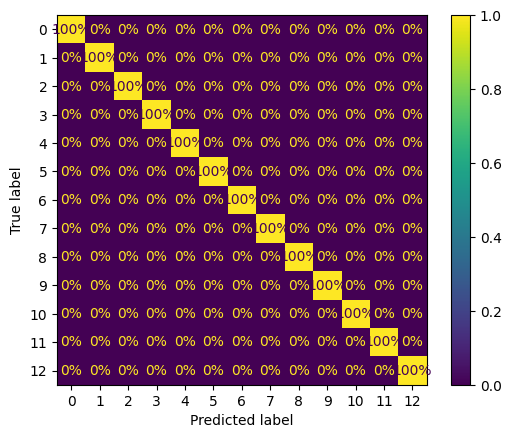

In [156]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_ast,
    normalize="true",
    values_format=".0%",)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


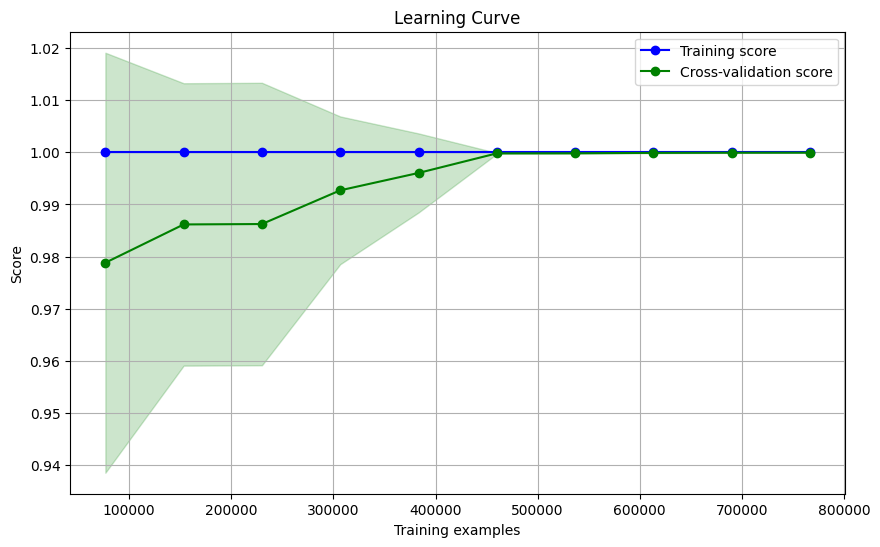

In [157]:
plot_learning_curve(dt_clf, X, y)

## Benchmarks

In [172]:
def plot_model_performance(metrics_dict):
    data = []
    for model, metrics in metrics_dict.items():
        for metric, value in metrics.items():
            data.append({"Model": model, "Metric": metric, "Score": value})

    df = pd.DataFrame(data)

    plt.figure(figsize=(18, 8))
    sns.barplot(data=df, x="Model", y="Score", hue="Metric")

    plt.ylim(0, 1)
    plt.tight_layout(rect=[0, 0, 0.9, 1])
    plt.title("Model Performance Comparison")
    plt.xlabel("Models")
    plt.ylabel("Score")
    plt.xticks(rotation=45)
    plt.legend(title="Metrics")
    plt.grid(True)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

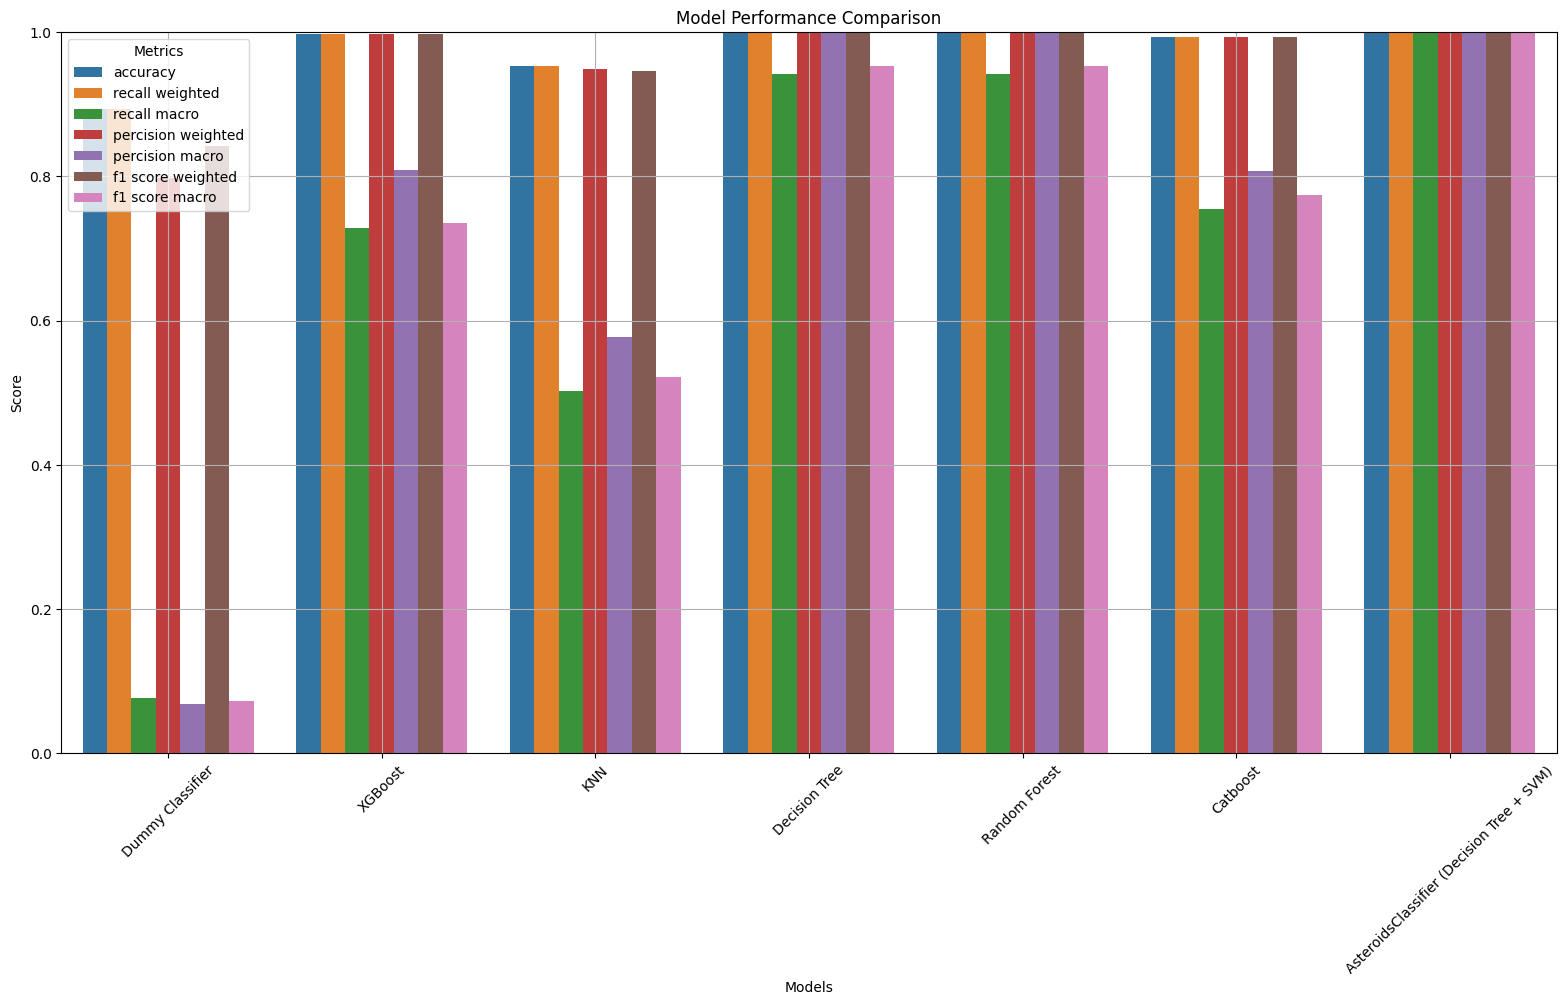

In [173]:
metrics = {
    'Dummy Classifier': evaluate_model(y_test, y_pred_dummy, False),
    'XGBoost': evaluate_model(y_test, y_pred_xgb, False),
    'KNN': evaluate_model(y_test, y_pred_knn, False),
    'Decision Tree': evaluate_model(y_test, y_pred_dt, False),
    'Random Forest': evaluate_model(y_test, y_pred_rf, False),
    'Catboost': evaluate_model(y_test, y_pred_cat, False),
    'AsteroidsClassifier (Decision Tree + SVM)': evaluate_model(y_test, y_pred_ast, False),
}

plot_model_performance(metrics)
